In [3]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
bg_full = pd.read_excel("C:/Users/User/Documents/UNITN/Computational social science/bulgaria/full_table.xlsx")
#bg_full

In [17]:
bg_cities = bg_full.drop([0,1,2,8,14,19,24,25,31], axis = 0)
bg_cities.to_csv("C:/Users/User/Documents/UNITN/Computational social science/bulgaria/only_cities.csv")
#bg_cities_x = bg_cities.drop("Region", axis = 1)

In [26]:
only_cities = pd.read_csv("C:/Users/User/Documents/UNITN/Computational social science/bulgaria/scaled_full_table.csv")
only_cities = only_cities.drop(only_cities.columns[0], axis = 1)

In [34]:
only_cities_X = only_cities.drop(only_cities.columns[[22, 23, 24,25]], axis = 1)
only_cities_y_list = [only_cities["labs_hc3"], only_cities["labs_hc4"], only_cities["labs_hc5"]]
only_cities_X
only_cities_y_list

[0     1
 1     1
 2     1
 3     1
 4     1
 5     1
 6     1
 7     1
 8     1
 9     1
 10    2
 11    1
 12    1
 13    1
 14    2
 15    1
 16    1
 17    1
 18    1
 19    1
 20    1
 21    1
 22    3
 23    1
 24    1
 25    2
 26    1
 27    1
 Name: labs_hc3, dtype: int64,
 0     1
 1     1
 2     1
 3     1
 4     1
 5     1
 6     1
 7     1
 8     1
 9     1
 10    2
 11    1
 12    1
 13    1
 14    3
 15    1
 16    1
 17    1
 18    1
 19    1
 20    1
 21    1
 22    4
 23    1
 24    1
 25    2
 26    1
 27    1
 Name: labs_hc4, dtype: int64,
 0     1
 1     2
 2     2
 3     1
 4     1
 5     1
 6     1
 7     1
 8     1
 9     1
 10    3
 11    1
 12    1
 13    1
 14    4
 15    2
 16    1
 17    1
 18    1
 19    1
 20    1
 21    1
 22    5
 23    1
 24    1
 25    3
 26    2
 27    1
 Name: labs_hc5, dtype: int64]

In [97]:
tsne = TSNE(n_components=2, perplexity=0.005, n_iter=300)
tsne_results = tsne.fit_transform(only_cities_X)

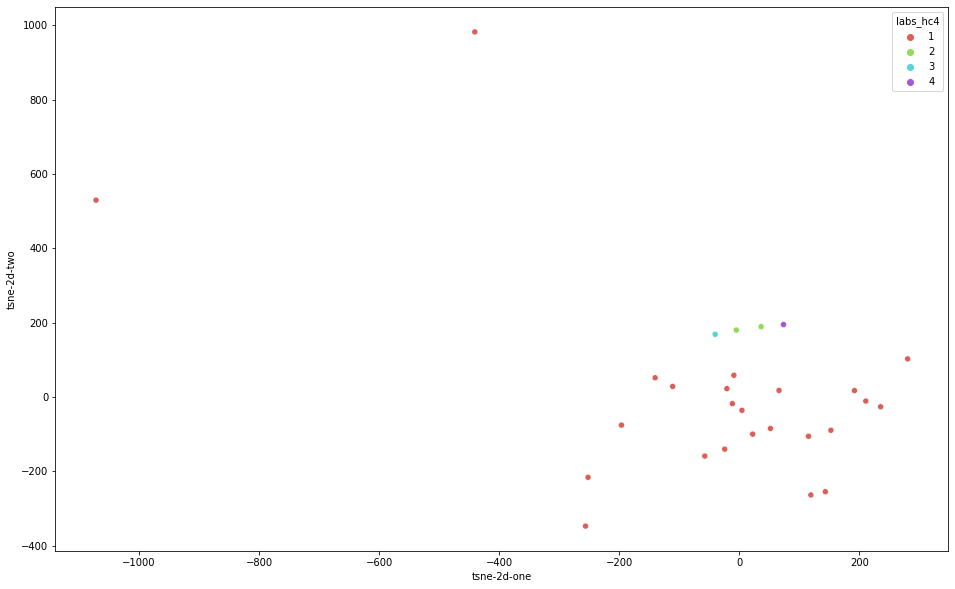

In [98]:
df_subset = pd.DataFrame()
df_subset['tsne-2d-one'] = tsne_results[:, 0]
df_subset['tsne-2d-two'] = tsne_results[:, 1]

plt.figure(figsize=(16, 10))

sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue= only_cities_y_list[1],
    palette=sns.color_palette("hls", 4),
    data=df_subset,
    legend="full",
    alpha=1
)

plt.show()

# PCA

In [99]:


df = pd.DataFrame()
# instantiate a PCA object
pca = PCA(n_components=10)
# compute PCA and transform the data
pca_result = pca.fit_transform(only_cities_X)
# save to dataframe
df['pca-one'] = pca_result[:, 0]
df['pca-two'] = pca_result[:, 1] 
df['pca-three'] = pca_result[:, 2]
df['pca-four'] = pca_result[:, 3]
df['pca-five'] = pca_result[:, 4]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.5781817  0.12054457 0.0789496  0.07294799 0.04869279 0.03815357
 0.01899991 0.01537836 0.01322768 0.00623268]


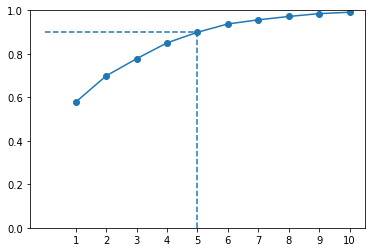

In [109]:
plt.plot(range(1, 11), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = "-")
plt.ylim(0, 1)
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.vlines(5, 0, pca.explained_variance_ratio_.cumsum()[4], linestyle = "--")
plt.hlines(pca.explained_variance_ratio_.cumsum()[4],0, 5, linestyle = "--")

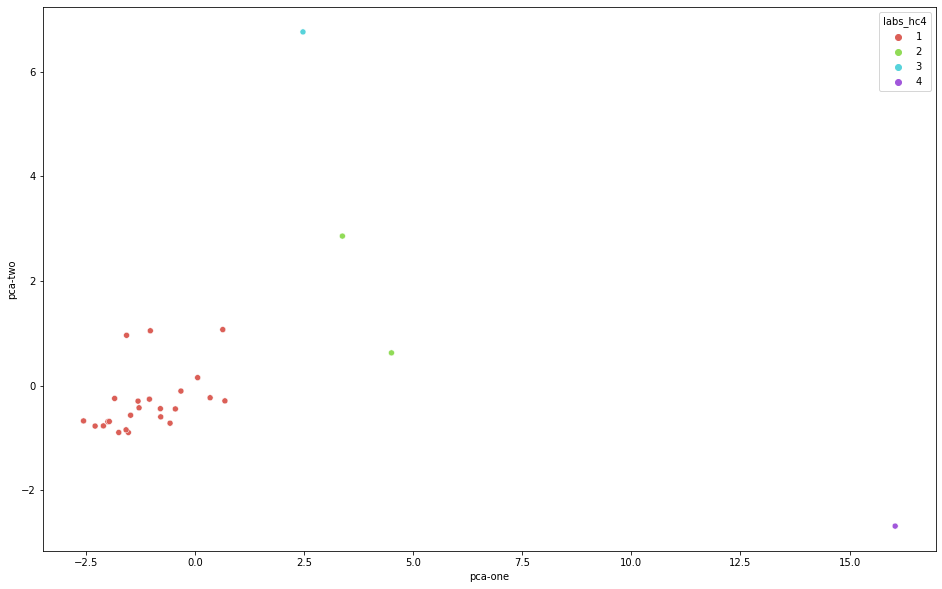

In [68]:
plt.figure(figsize=(16, 10))

sns.scatterplot(
    x="pca-one", y="pca-two",
    hue=only_cities_y_list[1],
    palette=sns.color_palette("hls", 4),
    data=df,
    legend="full",
)

plt.show()

Better job, show this one

# UMAP 

In [51]:
import umap

In [73]:
tf = umap.UMAP(n_neighbors=3, random_state=42).fit(only_cities_X)

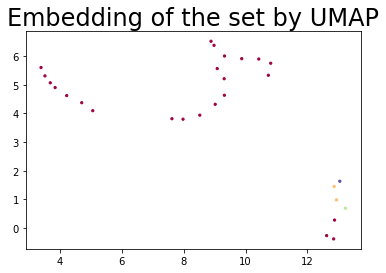

In [74]:
plt.scatter(tf.embedding_[:, 0], tf.embedding_[:, 1], s=5, c=only_cities_y_list[1], cmap='Spectral')
plt.title('Embedding of the set by UMAP', fontsize=24);

# TSNE new

In [6]:
bul_with_labs = pd.read_csv("C:/Users/User/Documents/UNITN/Computational social science/bulgaria/bul_with_labels.csv")
#bul_with_labs

In [5]:
bul_with_labs_X = bul_with_labs.drop(["kmeans4", "labs_pca_hc4", "Region", "Unnamed: 0" ],axis = 1)
bul_with_labs_Yk4 = bul_with_labs.kmeans4
bul_with_labs_Yhc4 = bul_with_labs.labs_pca_hc4

In [29]:
tsne = TSNE(n_components=2, perplexity=2.5, n_iter=300)
tsne_results = tsne.fit_transform(bul_with_labs_X)

In [11]:
#bul_with_labs.kmeans4

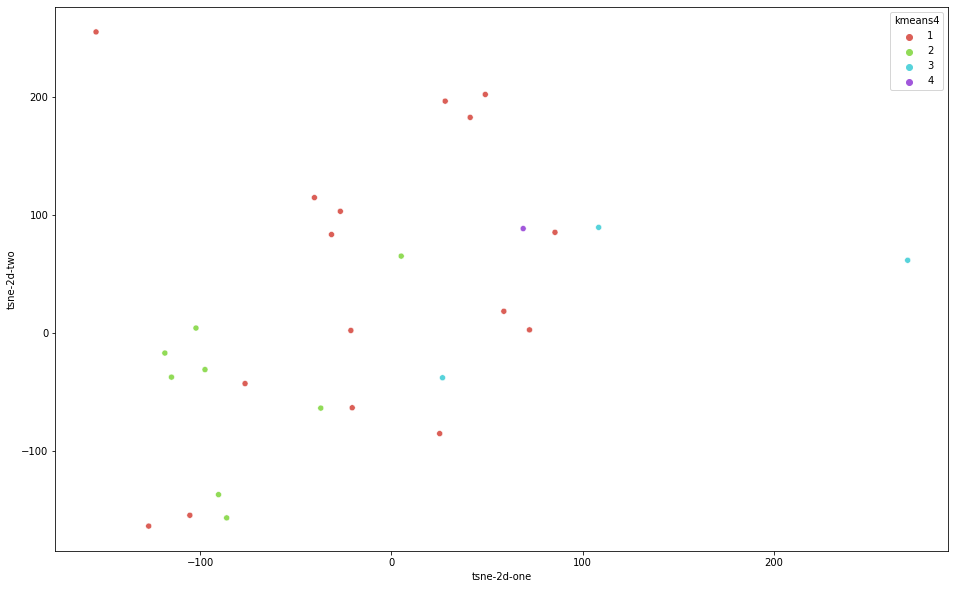

In [30]:
df_subset = pd.DataFrame()
df_subset['tsne-2d-one'] = tsne_results[:, 0]
df_subset['tsne-2d-two'] = tsne_results[:, 1]

plt.figure(figsize=(16, 10))

sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue= bul_with_labs.kmeans4,
    palette=sns.color_palette("hls", 4),
    data=df_subset,
    legend="full",
    alpha=1
)

plt.show()

In [8]:
bul_with_labs.columns

Index(['Unnamed: 0', 'Region', 'Population2021', 'fertility_rate',
       'unis_colleges_number', 'teaching_staff', 'students_enrolled',
       'graduates_uni', 'ratio_grad_enrolled_unis', 'TotalSchools',
       'gradtotot57', 'gradtotot812', 'employees_laborcontract_avg',
       'employees_laborcontract_avg_topop', 'avgwage', 'activity_rate',
       'labour_force_thousands', 'employment_rate',
       'foreign_direct_investment_euro', 'books_pamphlets',
       'accommodation_establishments', 'arrivals_accommodation',
       'revenue_accomm_lev', 'crimes', 'ecological_assets', 'water_supply2020',
       'connected_to_wastewater_collecting', 'Pop_watersupplyregime',
       'waste_thousandtons', 'hospitals2021', 'kmeans4', 'labs_pca_hc4'],
      dtype='object')

# UMAP new

In [31]:
import umap

In [43]:

tf = umap.UMAP(n_neighbors=6, random_state=42).fit(bul_with_labs_X)

Text(0.5, 1.0, 'Embedding of the set by UMAP')

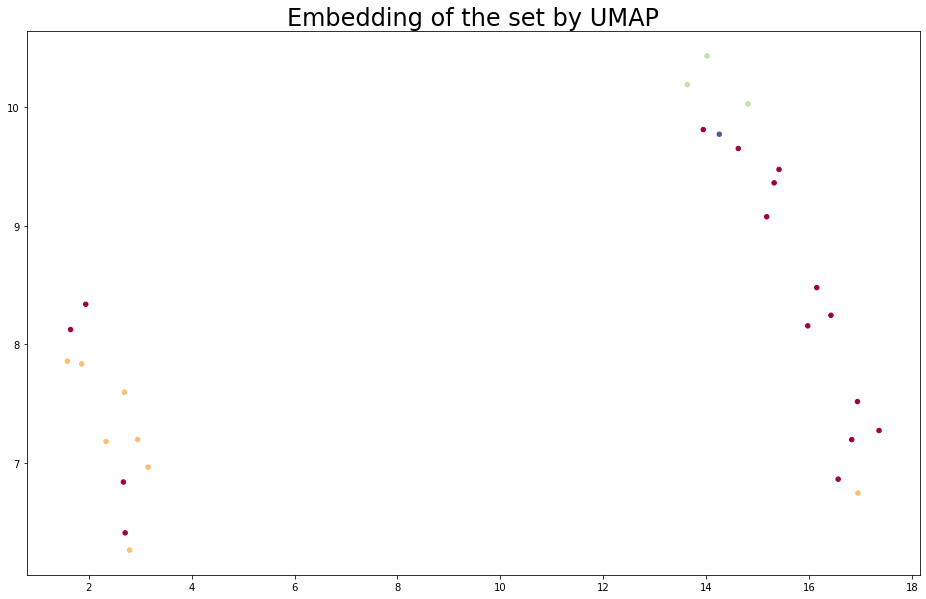

In [44]:
plt.figure(figsize=(16, 10))
plt.scatter(tf.embedding_[:, 0], tf.embedding_[:, 1], s=20, c=bul_with_labs.kmeans4, cmap='Spectral')
plt.title('Embedding of the set by UMAP', fontsize=24)

# with PCA table

In [10]:
pc5_table = pd.read_csv("C:/Users/User/Documents/UNITN/Computational social science/bulgariafirst5PCs.csv")
bul_with_labs = pd.read_csv("C:/Users/User/Documents/UNITN/Computational social science/bulgaria/bul_with_labels.csv")
#pc5_table

In [11]:
bul_with_labs.columns

Index(['Unnamed: 0', 'Region', 'Population2021', 'fertility_rate',
       'unis_colleges_number', 'teaching_staff', 'students_enrolled',
       'graduates_uni', 'ratio_grad_enrolled_unis', 'TotalSchools',
       'gradtotot57', 'gradtotot812', 'employees_laborcontract_avg',
       'employees_laborcontract_avg_topop', 'avgwage', 'activity_rate',
       'labour_force_thousands', 'employment_rate',
       'foreign_direct_investment_euro', 'books_pamphlets',
       'accommodation_establishments', 'arrivals_accommodation',
       'revenue_accomm_lev', 'crimes', 'ecological_assets', 'water_supply2020',
       'connected_to_wastewater_collecting', 'Pop_watersupplyregime',
       'waste_thousandtons', 'hospitals2021', 'kmeans4', 'labs_pca_hc4'],
      dtype='object')

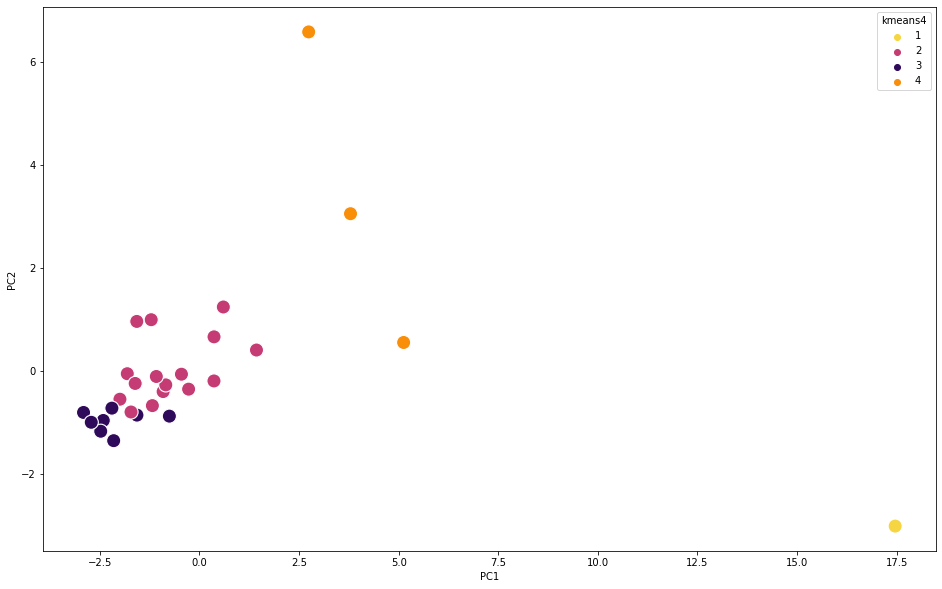

In [23]:
plt.figure(figsize=(16, 10))

sns.scatterplot(
    x="PC1", y="PC2",
    hue=bul_with_labs.kmeans4,
    palette={1:"#f6d543", 2:"#c53c74", 3:"#2f0a5b", 4:"#f98e09"},
    #palette=sns.color_palette("hls", 4),
    data=pc5_table,
    legend= "full",
    s = 200
)

plt.show()

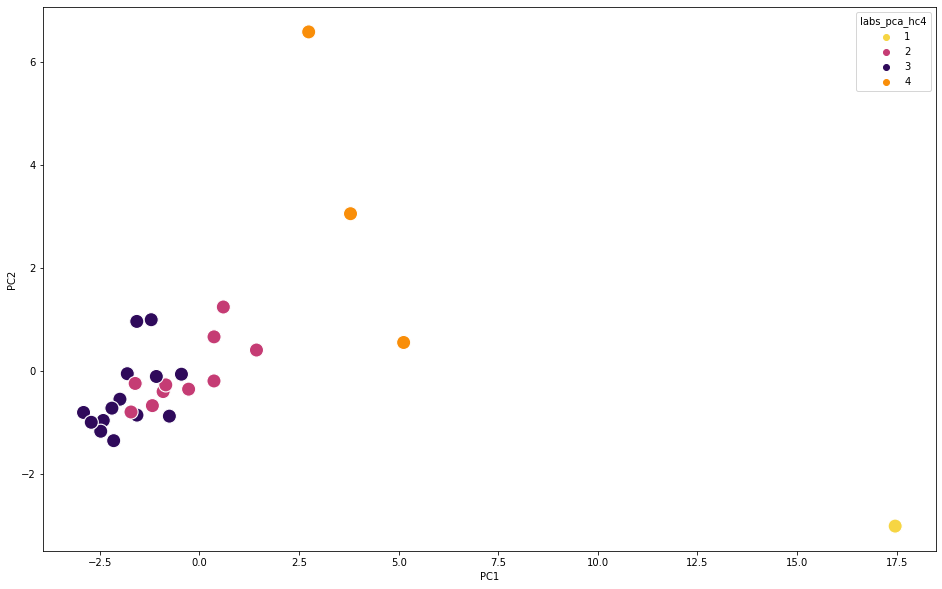

In [24]:
plt.figure(figsize=(16, 10))

sns.scatterplot(
    x="PC1", y="PC2",
    hue=bul_with_labs.labs_pca_hc4,
    palette={1:"#f6d543", 2:"#c53c74", 3:"#2f0a5b", 4:"#f98e09"},
    #palette=sns.color_palette("hls", 4),
    data=pc5_table,
    legend="full",
    s = 200
)

plt.show()